In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from hydra import compose, initialize
from omegaconf import open_dict
from tqdm import tqdm
import clip

from nd.datasets.things_text import ThingsTextCLIPDataset

device = "cuda:0"

with initialize(config_path="../configs/thingsmeg/"):
    args = compose(config_name="clip_text")

/tmp/ipykernel_3177340/3862876594.py:13: UserWarning: 
The version_base parameter is not specified.
Please specify a compatability version level, or None.
Will assume defaults for version 1.1
  with initialize(config_path="../configs/thingsmeg/"):


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.80it/s]


torch.Size([27048, 27048])
(731594304,)
Median: 0.005, mean: 0.005
X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.73it/s]


torch.Size([27048, 27048])
(731594304,)
Median: 0.025, mean: 0.023


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


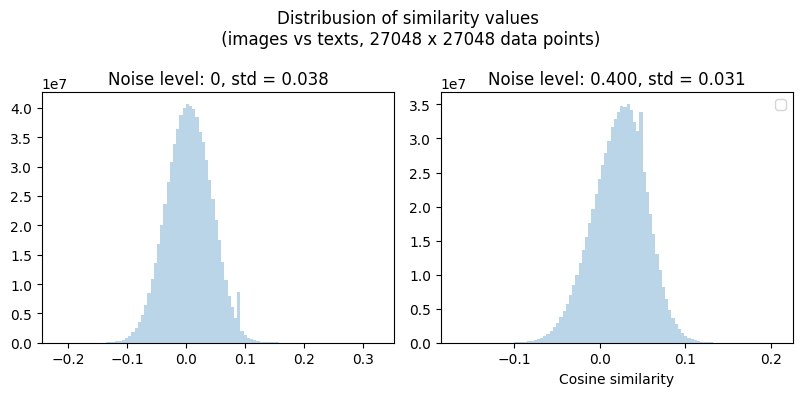

In [5]:
noise_levels = [0, 0.4] # [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

fig, axs = plt.subplots(
    ncols=len(noise_levels), figsize=(len(noise_levels) * 4, 4), tight_layout=True
)

for i, noise_level in enumerate(noise_levels):
    with open_dict(args):
        args.num_noises = 1
        args.noise_level = noise_level
        
    dataset = ThingsTextCLIPDataset(args)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batch_size, shuffle=False)

    noise_level = noise_level if noise_level == 0 else "{:.3f}".format(noise_level)
    model, _ = clip.load(
        f"../runs/thingstext/init_noise_level-{noise_level}_num_noises-4_/clip_best.pt", device=device
    )
    
    Z_list, Y_list = [], []
    for X, Y, _, _ in tqdm(dataloader):
        X, Y = X.to(device), Y.to(device)
        
        with torch.no_grad():   
            Z = model.encode_text(X).float()
        
        Z_list.append(Z)
        Y_list.append(Y.squeeze())
        
    Z = torch.cat(Z_list)
    Y = torch.cat(Y_list)
    
    Z /= Z.norm(dim=-1, keepdim=True)
    Y /= Y.norm(dim=-1, keepdim=True)

    sim = torch.matmul(Z, Y.T)
    # sim = torch.empty(Z.shape[0], Y.shape[0], device=device)
    # for n in range(Z.shape[0]):
    #     sim[n] = Z[n] @ Y.T
    
    print(sim.shape)
        
    sim = sim.cpu().numpy().flatten()
    print(sim.shape)
    print(f"Median: {np.median(sim):.3f}, mean: {np.mean(sim):.3f}")

    axs[i].hist(sim, bins=100, alpha=0.3)
    axs[i].set_title(f"Noise level: {noise_level}, std = {np.std(sim):.3f}")
    
plt.suptitle("Distribusion of similarity values\n (images vs texts, 27048 x 27048 data points)")
plt.xlabel("Cosine similarity")
plt.legend()

X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.78it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.70it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.58it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.51it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.45it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.42it/s]


X: torch.Size([27048, 77]) | Y: torch.Size([27048, 1, 768]) | train_idxs: torch.Size([22248]) | test_idxs: torch.Size([2400])


100%|██████████| 212/212 [00:10<00:00, 19.40it/s]


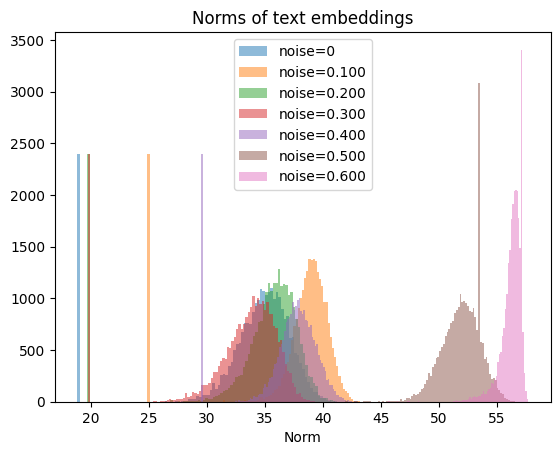

In [3]:
noise_levels = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

for i, noise_level in enumerate(noise_levels):
    with open_dict(args):
        args.num_noises = 1
        args.noise_level = noise_level
        
    dataset = ThingsTextCLIPDataset(args)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=args.batch_size, shuffle=False)

    noise_level = noise_level if noise_level == 0 else "{:.3f}".format(noise_level)
    model, _ = clip.load(
        f"../runs/thingstext/init_noise_level-{noise_level}_num_noises-4_/clip_best.pt", device=device
    )
    
    Z_list = []
    for X, _, _, _ in tqdm(dataloader):
        X = X.to(device)
        
        with torch.no_grad():   
            Z = model.encode_text(X).float()
        
        Z_list.append(Z)
        
    Z = torch.cat(Z_list)
    
    Z_norm = Z.norm(dim=-1).cpu().numpy()
        
    plt.hist(Z_norm, bins=100, alpha=0.5, label=f"noise={noise_level}")
    
plt.title("Norms of text embeddings")
plt.xlabel("Norm")
plt.legend()